In [89]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Data Collection and Pre-Processing #

In [90]:

df = pd.read_csv('diabetes.csv')

In [91]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [92]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [93]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [94]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [95]:
X = df.drop(columns='Outcome',axis=1)
Y = df['Outcome']

print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [96]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Standardization #

In [97]:
#Data Standardization

scaler = StandardScaler()

In [98]:
scaler.fit(X)

StandardScaler()

In [99]:
standardized_data = scaler.transform(X)

In [100]:
#All the values are in between -1 and 1 to make  better prediction
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [101]:
X = standardized_data
Y = df['Outcome']

In [102]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Start the Model training - split up into train and test split #

In [103]:
X_train, X_Test, Y_train, Y_test = train_test_split(X, Y, random_state=1, test_size=0.3, stratify=Y)

In [104]:
print(X.shape, X_train.shape, X_Test.shape)

(768, 8) (537, 8) (231, 8)


# Training the model #

In [105]:
classifier = svm.SVC(kernel='linear')

In [106]:
from sklearn.linear_model import LogisticRegression

classifier2 = LogisticRegression()
classifier2.fit(X_train, Y_train)

LogisticRegression()

In [107]:
type(classifier)

sklearn.svm._classes.SVC

Training the svm classifier

In [108]:
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

In [109]:

classifier2.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [110]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [111]:
X_train_prediction2 = classifier2.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction2, Y_train)

In [112]:
print("Accuracy of the training data svm: " , training_data_accuracy)
print("Accuracy of the training data logreg: " , training_data_accuracy2)


Accuracy of the training data svm:  0.7821229050279329
Accuracy of the training data logreg:  0.7839851024208566


In [113]:
#We need to test it on a different set to have a legitimate claim

X_test_prediction = classifier.predict(X_Test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print("Accuracy of the test data svm: " , test_data_accuracy)

X_test_prediction2 = classifier.predict(X_Test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, Y_test)

print("Accuracy of the test data with logreg: " , test_data_accuracy2)

Accuracy of the test data svm:  0.7662337662337663
Accuracy of the test data with logreg:  0.7662337662337663


# Make a prediction app
#  Now predict with all features if a person has diabetes or not #


In [114]:
inputData = [6,148,	72,	35,	0,	33.6,	0.627,	50]

#changing the input data to numpy array

input_data_as_array = np.asarray(inputData)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_array.reshape(1,-1)

#We have to standardize this because we standardized way before
#and trained our model on a standardized data set

std_data = scaler.transform(input_data_reshaped)

print(std_data)

prediction = classifier.predict(std_data)
prediction2 = classifier2.predict(std_data)

print("SVM: " , prediction)

print("Logreg: " , prediction2)

print(prediction[0])
print(prediction2[0])

if (prediction[0] == 0 or prediction2[0]==0):
    print("Person is not diabetic")
else:
    print("The person is diabetic")

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
SVM:  [1]
Logreg:  [1]
1
1
The person is diabetic


c:\Users\Adem\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [115]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_test, X_test_prediction)
cf_matrix

array([[134,  16],
       [ 38,  43]], dtype=int64)

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

Text(0.5, 23.52222222222222, 'Predicted label')

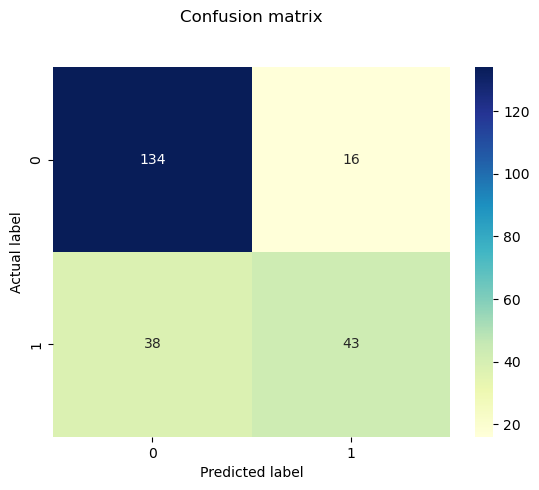

In [120]:

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [122]:
# classification report
target_names = ['No Diabetes', 'With Diabetes']
print('Classification report: \n', classification_report(Y_test, X_test_prediction,target_names=target_names))

Classification report: 
                precision    recall  f1-score   support

  No Diabetes       0.78      0.89      0.83       150
With Diabetes       0.73      0.53      0.61        81

     accuracy                           0.77       231
    macro avg       0.75      0.71      0.72       231
 weighted avg       0.76      0.77      0.76       231

